In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# import sys
# from pathlib import Path
# sys.path.append(str(Path().cwd().parent))

from utils import MinMaxScaler, get_ticket, MakeTimeSeries
from agent import Agent_xgb

from indicators import *

In [2]:
data = get_ticket("MGLU3.SA")
# data = get_ticket("VALE3.SA")
# data = data[-252:]

In [3]:
data.head()

,_Open,_High,_Low,_Close,_Volume
Date,,,,,
2011-05-02,4.207576,4.338246,4.207576,4.299045,29936513
2011-05-03,4.312112,4.361766,4.233710,4.259844,3599867
2011-05-04,4.265071,4.306885,4.265071,4.306885,4191406
2011-05-05,4.288590,4.288590,4.265071,4.280751,3752456
2011-05-06,4.272910,4.280751,4.181442,4.249390,4134612


In [4]:
preprocessor = Pipeline(steps=[
    # ("Scaler", MinMaxScaler(cols_list=["_Open", "_High", "_Low", "_Close"])),
    ("SMA", SimpleMovingAverage(short=7, middle=23, long=71, graphic=True)),
    ("RSI/IFR", RelativeStrengthIndex(window=14, graphic=True)),
    ("AO", AwesomeOscillator(short=5, long=34, graphic=True)),
    ("MACD", MovingAverageConvergenceDivergence(short=12, long=26, signal=9, graphic=True)),
    ("ADX/DMI", AverageDirectionalIndex(window=14, threshold=20, graphic=True)),
    # ("OBV", OnBalanceVolume()), # Transformar num sinal!
    ("BB", BollingerBands(window=40, entry_threshold=0.5, out_tp_threshold=1.5, out_sl_threshold=0, graphic=True)),
    ("Ichimoku", IchimokuClouds(window1=9, window2=26, window3=52, graphic=True)),
    # ("VWAP", VolumeWeightedAveragePrice(graphic=True)),  # Transformar num sinal!
    ("Par.SAR", ParabolicSAR(acceleration=0.02, maximum=0.2, graphic=True)),
    ("Aleatory", Aleatory(lack_trend=150, graphic=True)),
    ("Trend", Trend(short=23, long=71, graphic=True)),
    ("MakeTimeSeries", MakeTimeSeries(window=1, indicators=None)) # indicators=['SMA', ...]
])

In [5]:
_ = preprocessor.fit(data)
data_preprocessed = preprocessor.transform(data)

In [6]:
data_preprocessed.head()

,_Open,_High,_Low,_Close,_Volume,SMA D-0,RSI D-0,AO D-0,MACD D-0,ADX D-0,BB D-0,Ichimoku D-0,pSAR_ind D-0,Aleatory D-0,Trend
Date,,,,,,,,,,,,,,,
2011-06-16,4.312111,4.408807,4.178828,4.390513,2052423,0,72.321348,0.181032,0.018362,1,0,0.105842,0.015617,1,0
2011-06-17,4.364380,4.374834,4.194509,4.312112,811526,0,61.506192,0.155075,0.006646,1,0,0.105842,0.017074,1,0
2011-06-20,4.267684,4.285978,4.189283,4.233710,820422,0,53.787881,0.093337,-0.006447,1,0,0.105842,0.013697,1,0
2011-06-21,4.207575,4.359152,4.204962,4.338245,637383,0,57.042174,0.055558,-0.008028,1,0,0.105842,0.014629,1,0
2011-06-22,4.275524,4.359153,4.244164,4.246777,1114651,0,47.491678,0.031307,-0.014800,1,0,0.105842,0.021821,1,0


In [7]:
sample = data_preprocessed.iloc[-500:].copy()
data_preprocessed.drop(sample.index, inplace=True)

In [8]:
sample.sample(5)

,_Open,_High,_Low,_Close,_Volume,SMA D-0,RSI D-0,AO D-0,MACD D-0,ADX D-0,BB D-0,Ichimoku D-0,pSAR_ind D-0,Aleatory D-0,Trend
Date,,,,,,,,,,,,,,,
2024-07-25,11.329197,11.581605,11.202994,11.261242,14540200,-1,29.306944,-0.075037,-0.187020,-1,0,0.475691,0.003993,1,-1
2025-01-27,6.164558,6.834408,6.116019,6.805285,27601900,-1,56.721316,-0.596811,0.170986,1,0,-0.334925,-0.231834,1,0
2024-07-01,11.668976,11.931091,11.533065,11.785472,16498900,0,47.330970,-0.908380,0.243741,1,0,-0.830031,-0.184595,1,0
2024-02-28,21.163366,21.551686,20.677968,21.066288,8894930,1,58.571442,1.061902,0.138634,1,0,0.839185,0.144617,0,0
2024-03-08,19.610093,20.095491,19.513013,19.901331,5635940,1,47.499998,0.670394,-0.123457,1,1,0.721819,0.059984,0,0


In [9]:
despise = ['_Open', '_High', '_Low', '_Close', '_Volume', 'Aleatory D-0']
# despise = ['_Open', '_High', '_Low', '_Close', '_Volume', 'Aleatory D-0', 'Aleatory D-1', 'Aleatory D-2', 'Aleatory D-3', 'Aleatory D-4', 'Aleatory D-5']

In [10]:
agent = Agent_xgb(data = data_preprocessed, drop_intersection_time_series = None, despise = despise)


                Task: regression

                Total of registers: 2967
                Total of valid registers: 2967
                Total of invalid registers: 0

                Total of training registers: 2076
                Total of validation registers: 445
                Total of test registers: 446

                Features before preprocessing: 8
                Features after preprocessing: 8

                Numerical Features: ['SMA D-0', 'RSI D-0', 'AO D-0', 'MACD D-0', 'ADX D-0', 'BB D-0', 'Ichimoku D-0', 'pSAR_ind D-0']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['Trend']
            


### Results Optimum

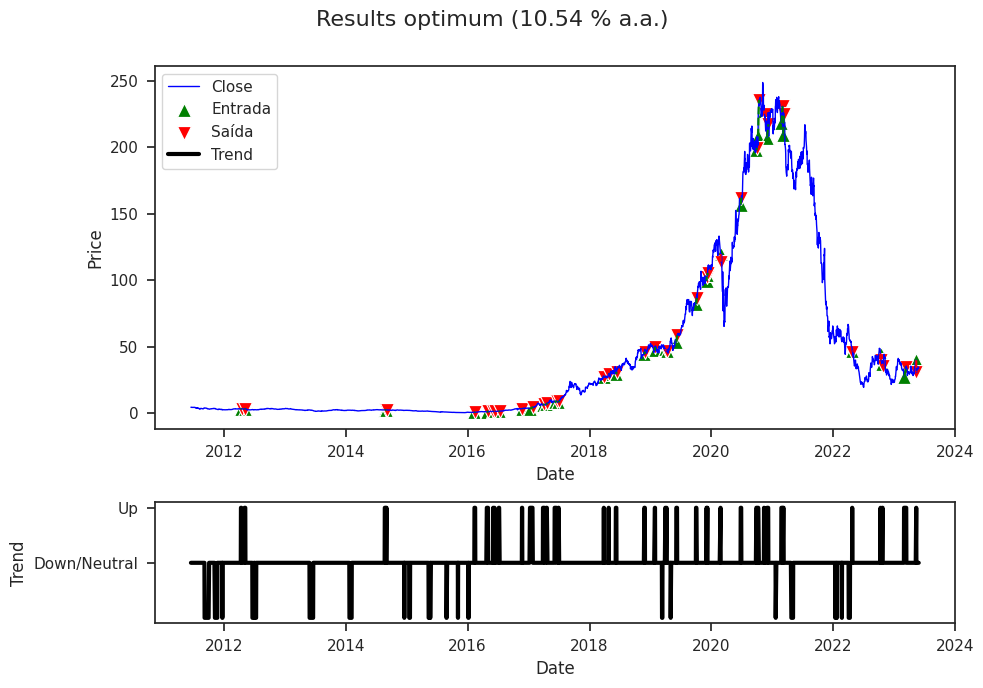

In [11]:
agent.optimum_choice(data_preprocessed)

### Naive Choice

##### Aleatory

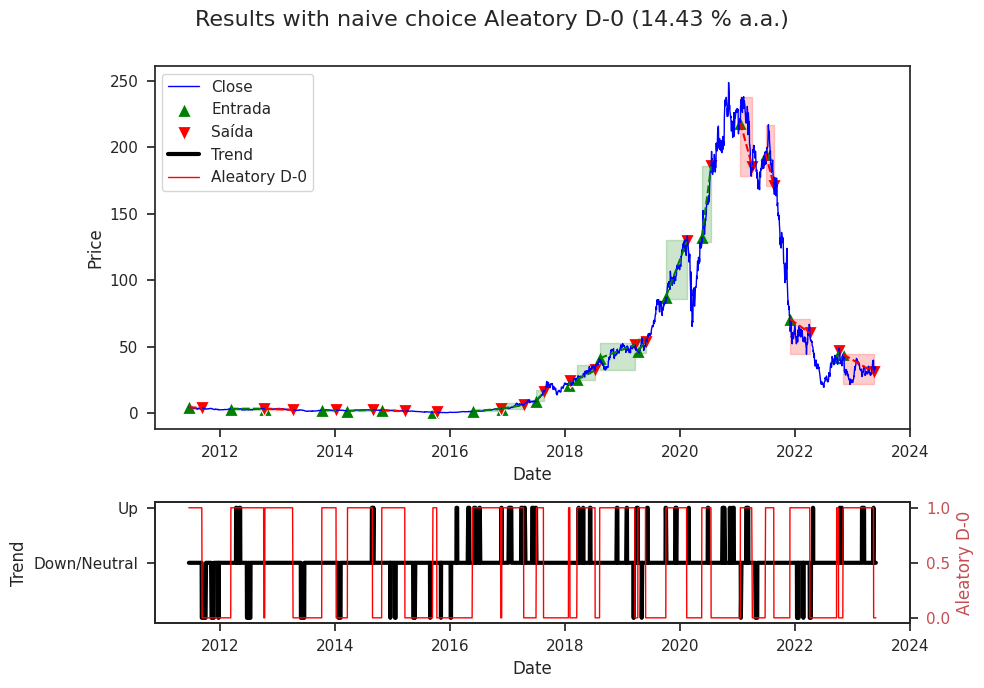

np.float64(14.427602381027405)

In [12]:
agent.naive_choice(data_preprocessed, signal="Aleatory D-0", policy={"entry": lambda signal: signal > 0.5, "out": lambda signal: signal <= 0.5})

##### SMA

In [25]:
bigger = - np.inf

for entry in np.linspace(0, 1, 21):
    for out in np.linspace(0, 1, 21):
    
        profit = agent.naive_choice(data_preprocessed, signal="SMA D-0", policy={"entry": lambda signal: signal > entry, "out": lambda signal: signal <= out}, graphic=False)
        # print(f"Profit: {profit:.2f} with Entry: {entry:.2f}, Out: {out:.2f}")
        if profit > bigger:
            bigger = profit
            print(f"\nNew best: {bigger:.2f} with Entry: {entry:.2f}, Out: {out:.2f}\n\n")
            


New best: 17.65 with Entry: 0.00, Out: 0.00




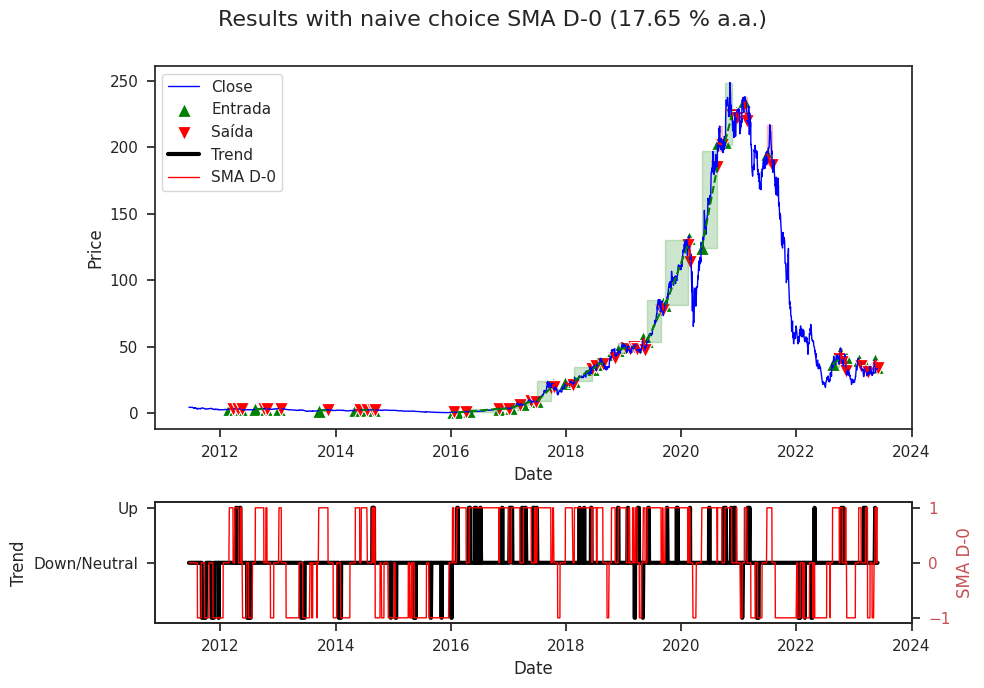

In [29]:
profit = agent.naive_choice(data_preprocessed, signal="SMA D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0})

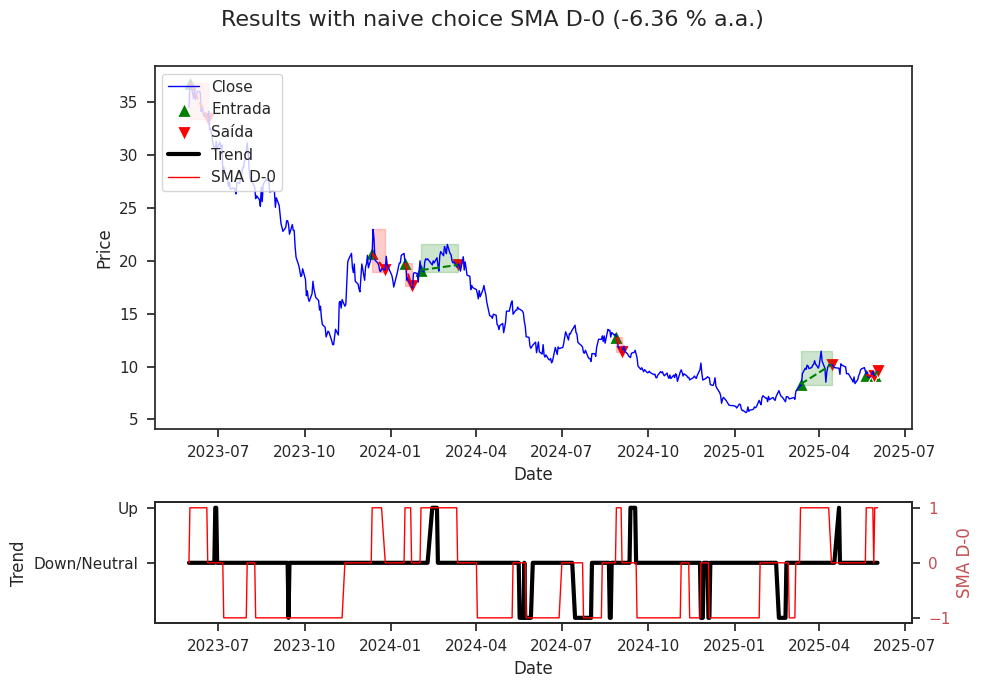

In [28]:
profit = agent.naive_choice(sample, signal="SMA D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0})

##### RSI

In [36]:
bigger = - np.inf

for entry in np.linspace(0, 100, 21):
    for out in np.linspace(0, 100, 21):
    
        profit = agent.naive_choice(data_preprocessed, signal="RSI D-0", policy={"entry": lambda signal: signal < entry, "out": lambda signal: signal > out}, graphic=False)
        # print(f"Profit: {profit:.2f} with Entry: {entry:.2f}, Out: {out:.2f}")
        if profit > bigger:
            bigger = profit
            print(f"\nNew best: {bigger:.2f} with Entry: {entry:.2f}, Out: {out:.2f}\n\n")
            


New best: 0.00 with Entry: 0.00, Out: 0.00



New best: 0.04 with Entry: 5.00, Out: 0.00



New best: 0.34 with Entry: 5.00, Out: 80.00



New best: 0.71 with Entry: 5.00, Out: 85.00



New best: 4.78 with Entry: 5.00, Out: 95.00



New best: 37.25 with Entry: 5.00, Out: 100.00




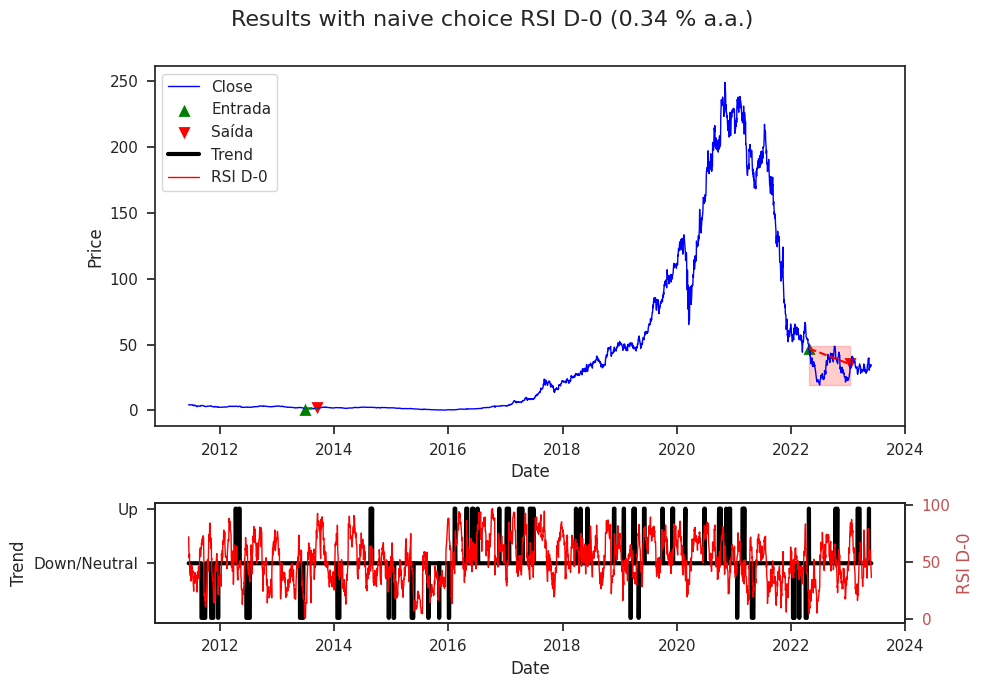

np.float64(0.3407446578558515)

In [38]:
agent.naive_choice(data_preprocessed, signal="RSI D-0", policy={"entry": lambda signal: signal < 5, "out": lambda signal: signal > 80})

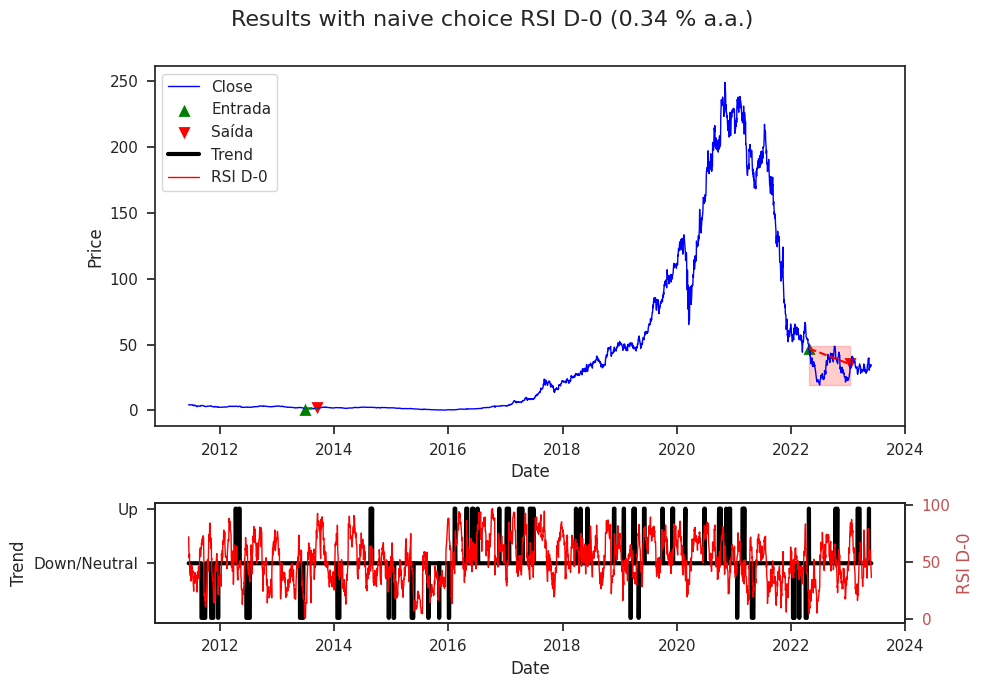

np.float64(0.3407446578558515)

In [39]:
agent.naive_choice(data_preprocessed, signal="RSI D-0", policy={"entry": lambda signal: signal < 5, "out": lambda signal: signal > 80})

##### AO

In [41]:
bigger = - np.inf

for entry in np.linspace(0, 100, 21):
    for out in np.linspace(0, 100, 21):
    
        profit = agent.naive_choice(data_preprocessed, signal="AO D-0", policy={"entry": lambda signal: signal > entry, "out": lambda signal: signal <= out}, graphic=False)
        # print(f"Profit: {profit:.2f} with Entry: {entry:.2f}, Out: {out:.2f}")
        if profit > bigger:
            bigger = profit
            print(f"\nNew best: {bigger:.2f} with Entry: {entry:.2f}, Out: {out:.2f}\n\n")
            


New best: 21.55 with Entry: 0.00, Out: 0.00



New best: 43.31 with Entry: 15.00, Out: 0.00



New best: 137.88 with Entry: 20.00, Out: 0.00




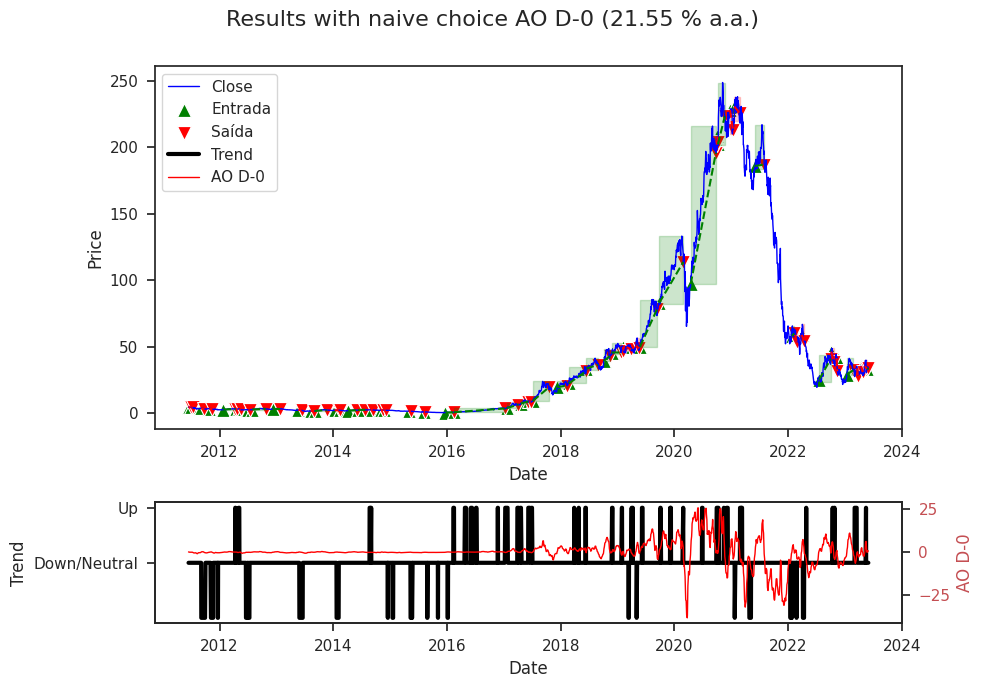

np.float64(21.54822099326694)

In [46]:
agent.naive_choice(data_preprocessed, signal="AO D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0})

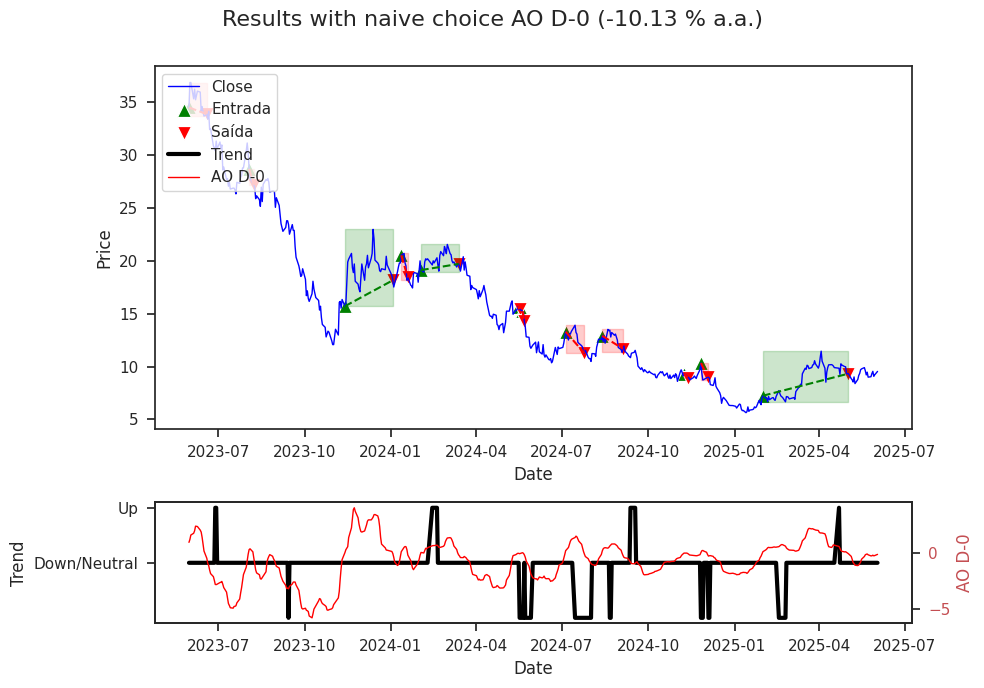

np.float64(-10.128311886735986)

In [47]:
agent.naive_choice(sample, signal="AO D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0})

##### MACD

In [ ]:
agent.naive_choice(data_preprocessed, signal="MACD D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0})

##### ADX

In [ ]:
agent.naive_choice(data_preprocessed, signal="ADX D-0", policy={"entry": lambda signal: signal > 0.5, "out": lambda signal: signal <= 0.5})

##### BB

In [ ]:
agent.naive_choice(data_preprocessed, signal="BB D-0", policy={"entry": lambda signal: signal > 0.5, "out": lambda signal: signal <= 0.5})

##### Ichimoku

In [ ]:
agent.naive_choice(data_preprocessed, signal="Ichimoku D-0", policy={"entry": lambda signal: signal > 0.5, "out": lambda signal: signal <= 0})

##### Parabolic SAR

In [ ]:
agent.naive_choice(data_preprocessed, signal="pSAR_ind D-0", policy={"entry": lambda signal: signal > 0, "out": lambda signal: signal <= 0.001})

##### Optimization and Fit

In [ ]:
agent.optimizer(n_trials=5)

In [ ]:
agent.fit(path="../saved")

In [ ]:
agent.feature_importances()

### Real Result

In [ ]:
results = agent.predict(sample, path="../", return_df=True)